In [1]:
import numpy as np 
import scipy as sp
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from pprint import pprint

# Problem 1
Suppose your expectations regarding the stock price are as follows:
<div>
<img src="fig1.png" width="500"/>
</div>
Compute the mean and standard deviation of the HPR on stocks.

In [2]:
ps, rs = np.asarray([0.35, 0.30, 0.35]), np.asarray([.3,.1,-.1])
expected_return = np.sum(ps*rs)
var = np.sum(ps*(rs - expected_return)**2)
print(f"E(r) = {expected_return:.2f}, Variance = {var:.3f}")

E(r) = 0.10, Variance = 0.028


# Problem 2 
Visit Professor Kenneth French’s data library Web site: https://mba.tuck.dartmouth.edu/pages/faculty/ken.french/data_library.html and download the monthly returns
of “Fama/French 3 Factors” from January 1927–December 2022. Split the sample in half.
For each of the market (Mkt-RF) factor, small minus big (SML) factor, and high minus low
(HML) factor for the two halves, plot the histogram of the monthly returns, and compute:

•average 

•SD

•skew

•kurtosis

•1% value at risk (VaR)

•1% expected shortfall (ES)

Do the three split-halves statistics suggest to you that returns come from the same distribution over the entire period?

In [3]:
# Reading in cleaned up data
df = pd.read_csv('data_adj.csv')

# Converting date number to date object
df['Date'] = pd.to_datetime(df['Date'].apply(lambda x: '/'.join((str(x)[4:], str(x)[:4]))), format="%m/%Y")

# Splitting data into two halves 
left, right = df.iloc[:len(df)//2], df.iloc[len(df)//2:]

In [4]:
def avg(x):
    return np.mean(x)
def sd(x):
    return np.std(x)
def skew(x):
    return sp.stats.skew(x)
def kurtosis(x):
    return sp.stats.kurtosis(x)
def var(x, quantile=0.01):
    return np.quantile(x, quantile)
def es(x, quantile=0.01):
    q = var(x, quantile)
    return x[x < q].mean() 

dicts = {}
for i, data in enumerate([left, right]):
    side = {} 
    for ret in ['Mkt-RF', 'SMB', 'HML']:
        d = {}
        d['avg'] = avg(data[ret])
        d['sd'] = sd(data[ret])
        d['skew'] = skew(data[ret])
        d['kurtosis'] = kurtosis(data[ret])
        d['var'] = var(data[ret])
        d['es'] = es(data[ret])
        side[ret] = d
    if i == 0:
        dicts['left'] = side
    else:
        dicts['right'] = side
pprint(dicts)

{'left': {'HML': {'avg': 0.4618998272884282,
                  'es': -10.549999999999999,
                  'kurtosis': 22.439537698558624,
                  'sd': 3.9655493797056987,
                  'skew': 2.94581094169044,
                  'var': -8.3672},
          'Mkt-RF': {'avg': 0.6180138169257341,
                     'es': -22.248333333333335,
                     'kurtosis': 8.314098035924761,
                     'sd': 6.0266352693629965,
                     'skew': 0.4632693183567077,
                     'var': -16.6418},
          'SMB': {'avg': 0.1907253886010363,
                  'es': -7.928333333333334,
                  'kurtosis': 26.425659072408248,
                  'sd': 3.3310506766264485,
                  'skew': 2.8417958186684777,
                  'var': -6.7238}},
 'right': {'HML': {'avg': 0.259671848013817,
                   'es': -10.264999999999999,
                   'kurtosis': 2.3250666670796702,
                   'sd': 3.1007416901055165,
  

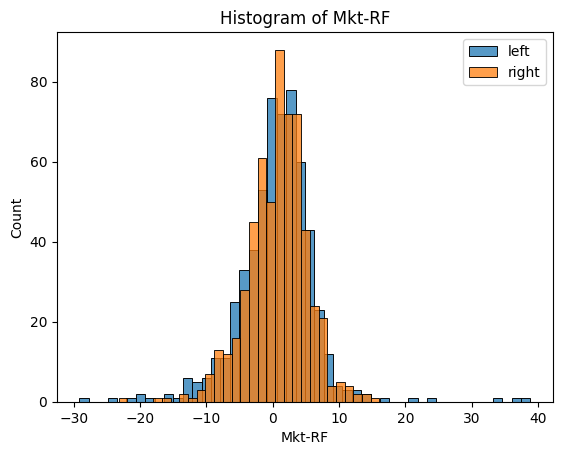

In [5]:
# Market RF
sns.histplot(data=left, x='Mkt-RF', label='left')
sns.histplot(data=right, x='Mkt-RF', label='right')
plt.title("Histogram of Mkt-RF")
plt.legend()
plt.show()

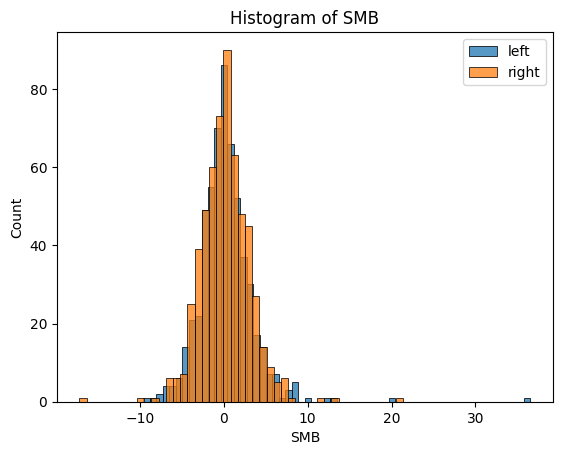

In [6]:
# SML
sns.histplot(data=left, x='SMB', label='left')
sns.histplot(data=right, x='SMB', label='right')
plt.title("Histogram of SMB")
plt.legend()
plt.show()

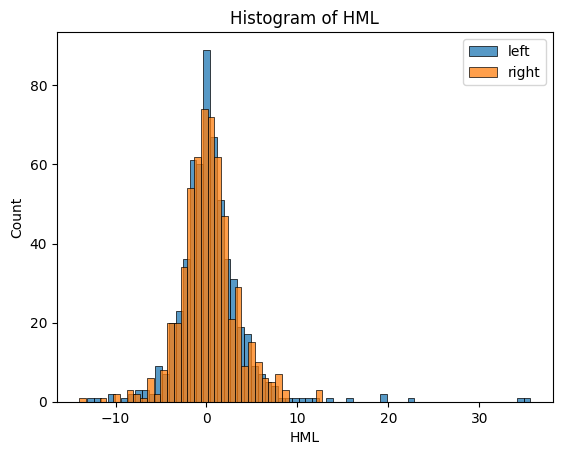

In [7]:
# SML
sns.histplot(data=left, x='HML', label='left')
sns.histplot(data=right, x='HML', label='right')
plt.title("Histogram of HML")
plt.legend()
plt.show()

Based of the plots and the and the calculated metrics about the left and right half, it seems that they are from the same distribution over the entire period.

# Problem 3
You manage a risky portfolio with an expected rate of return of 20% and a standard
deviation of 30%. The T-bill rate is 5%.

<img src="p3.jpeg" alt="Alternative text" />

# Problem 4
A pension fund manager is considering three mutual funds. The first is a stock fund, the
second is a long-term bond fund, and the third is a money market fund that provides a safe
return of 5%. The characteristics of the risky funds are as follows:

Expected Return Standard Deviation

Stock fund (S) 20% 30%

Bond fund (B) 10% 10%

The correlation between the fund returns is .20.

(a) [4pts] What are the investment proportions in the minimum-variance portfolio of the
two risky funds, and what are the expected value and standard deviation of its rate of
return?

(b) [4pts] Tabulate and draw the investment opportunity set of the two risky funds. Use
investment proportions for the stock fund of 0% to 100% in increments of 10%.

(c) [4pts] Draw a tangent from the risk-free rate to the opportunity set. What does your
graph show for the expected return and standard deviation of the optimal portfolio?

(d) [4pts] Solve numerically for the proportions of each asset and for the expected return
and standard deviation of the optimal risky portfolio.

(e) [4pts] What is the Sharpe ratio of the best feasible CAL?

(f) [6pts] You require that your portfolio yield an expected return of 12%, and that it be
efficient, that is, on the steepest feasible CAL.

•[3pts] What is the standard deviation of your portfolio?

•[3pts] What is the proportion invested in the money market fund and each of the
two risky funds?

(g) [4pts] If you were to use only the two risky funds and still require an expected return
of 12%, what would be the investment proportions of your portfolio? Compare its
standard deviation to that of the optimized portfolio in (f). What do you conclude?

In [8]:
# Defining portfolio characteristics
s_ret = .2
s_sd = .3
b_ret = .1
b_sd = .1
corr = .2
rf = .05

# Finding variance minizing values 
cov = corr * s_sd * b_sd
w_d = ((s_sd)**2 - cov) / (s_sd**2 + b_sd**2 - 2*cov)
w_e = 1 - w_d
opt_ret = s_ret*w_e + b_ret*w_d
opt_var= (w_d**2) * (b_sd**2) + (w_e**2) * (s_sd**2) + (2 * w_d * w_e * cov)
print(f"(a) The variance minizing portfolio allocation is {w_d*100:2f}% in bonds and"+ \
      f" {w_e*100:2f}% in equities\n    The return and standard deviation are: {opt_ret*100:.2f}% and {np.sqrt(opt_var)*100:.2f}%")

(a) The variance minizing portfolio allocation is 95.454545% in bonds and 4.545455% in equities
    The return and standard deviation are: 10.45% and 9.91%


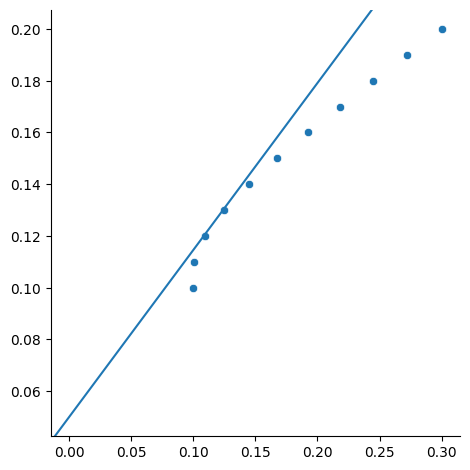

(b) See plot
(c) The tangent line intersects the opportunity set at the perfect hedging position (when portfolios are perfectly negatively correlated and maximizes the sharpe ratio


In [9]:
# Weights given perfeclty negatively correlated / maximizing sharp ratio
tan_d = s_sd / (s_sd + b_sd)
tan_e = 1 - tan_d
opt_ret = s_ret*tan_e + b_ret*tan_d
opt_var= (tan_d**2) * (b_sd**2) + (tan_e**2) * (s_sd**2) + (2 * tan_d * tan_e * cov)

# Creating the opportunity set
rets, vari = [], []
for i in range(0, 110, 10):
    w_d = i / 100
    w_e = 1 - w_d
    p_ret = s_ret*w_e + b_ret*w_d
    p_var= w_d**2 * b_sd**2 + w_e**2 * s_sd**2 + 2 * w_d * w_e * cov
    rets.append(p_ret), vari.append(p_var)

# Plotting the opportunity set and the tangent line     
m = (opt_ret - rf) / (np.sqrt(opt_var))
g = sns.relplot(x=np.sqrt(vari), y=rets)
g.ax.axline(xy1=(0, rf), slope=m)
plt.show()
print(f"(b) See plot\n(c) The tangent line intersects the opportunity set at the perfect hedging position (when portfolios are perfectly negatively correlated and maximizes the sharpe ratio")

In [10]:
print(f"(d) Stock: {tan_e*100:.2f}%, Bond: {tan_d*100:.2f}%, Return: {opt_ret*100:.2f}%, Stdev: {np.sqrt(opt_var)*100:.2f}%")

(d) Stock: 25.00%, Bond: 75.00%, Return: 12.50%, Stdev: 11.62%


In [11]:
sharpe = (opt_ret - rf) / np.sqrt(opt_var)
print(f"(e) The sharpe ratio is {sharpe:.5f}")

(e) The sharpe ratio is 0.64550


In [12]:
sigma_c = (.12-rf)/sharpe
y_c = (.12-rf)/(opt_ret-rf)
print(f"(f): The standard deviation: {sigma_c*100:.2f}%, The proportion invested in risky and risk free: {y_c*100:.2f} and {(1-y_c)*100:.2f}%")

(f): The standard deviation: 10.84%, The proportion invested in risky and risk free: 93.33 and 6.67%


In [13]:
#((b_ret-rf)*(s_sd**2)-(s_ret-rf)*(cov))/((b_ret-rf)*(s_sd**2)+(s_ret-rf)*(b_sd**2)-((b_ret-rf)+(s_ret-rf))*cov)

(g): see below
<img src="julanna.jpeg" alt="Alternative text" />
We conclude that investing in the risk free fund (money markets) is more optimal in terms of expected return and allocating everything to the risky fund is not

# Problem 5
Let RB be the rate of excess return on the bond fund and RS be the rate of return on
the stock fund. Let the variance of RB be σ2B, the variance of RS be σ2S, and the covariance
between RB and RS be Cov(RB,RS).
Suppose a portfolio has wB proportion invested in the bond fund and the remainder
wS = 1 −wB in the stock fund. Show that the weight wB that maximizes the Sharpe ratio
equals

<img src="HW_2_Problem_5-1.jpg" alt="Alternative text" />